# **16_house**

### **집값 분석**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/google/california_housing_train.csv')

In [ ]:
# 데이터 상위 5개 보기
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [ ]:
# 각 열의 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16999 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  int64  
 3   total_rooms         17000 non-null  int64  
 4   total_bedrooms      17000 non-null  int64  
 5   population          17000 non-null  int64  
 6   households          17000 non-null  int64  
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [ ]:
# 각 열의 집계함수 호가인하기
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16999.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562176,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005206,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# 실습하기. 비어 있는 행 있는지 확인하기
df.isnull().sum()

longitude             1
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
# 실습하기. 비어 있는(결측치) 행 조회하기
df.longitude.isnull()
df.loc[df.longitude.isnull(), :]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7977,NaN,34.01,44,2010,394,961,365,4.5982,333500


In [ ]:
# 비어있는 longitude의 값을 -118.41
df.loc[df.longitude.isnull(), 'longitude'] = -118.41

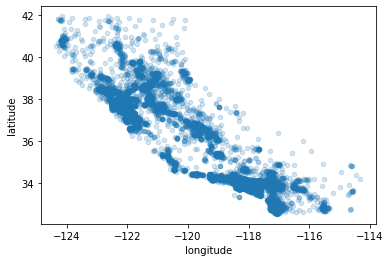

In [ ]:
# 데이터 시각화하기
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.2) # alpha를 사용하여 투명도를 조정한다.(0 ~ 1)

In [ ]:
# 이미지를 배경으로 사용한 시각화
import matplotlib.image as mpimg
cal_img = mpimg.imread('https://raw.githubusercontent.com/luxdolorosa/data_set/master/google/california.png')

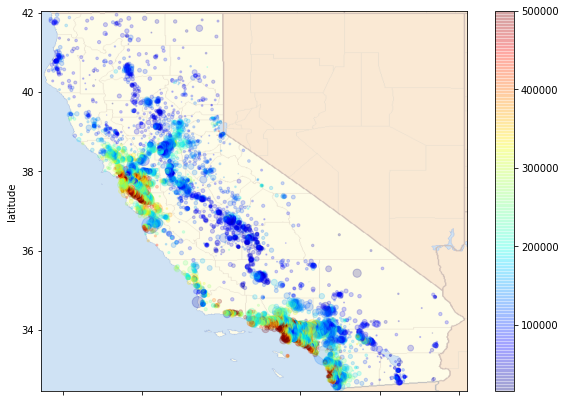

In [ ]:
df.plot(kind = 'scatter', 
        x = 'longitude', 
        y = 'latitude', 
        s = df.population/100, 
        c = df.median_house_value, 
        cmap = plt.get_cmap('jet'), 
        figsize = (10, 7), 
        alpha = 0.2)

plt.imshow(cal_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5)

In [ ]:
# 집 값과 관련이 있는 변수 찾기(특성 찾기)
corr_matrix = df.corr()
corr_matrix.median_house_value

longitude            -0.044982
latitude             -0.144917
housing_median_age    0.106758
total_rooms           0.130991
total_bedrooms        0.045783
population           -0.027850
households            0.061031
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

### **새로운 특성을 도출**

In [ ]:
# 방 갯수 / 가정수
# - 가정수에 따른 방 갯수 비율
df['room_per_household'] = df.total_bedrooms / df.households

In [ ]:
# 침실수 / 전체 방
# - 방 대비 침실수가 적으면 집이 크고 비싸다는 것을 예상
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms

In [ ]:
# 인구수 / 가정수
# - 가정의 구성원 수가 많으면 집이 크고 비싸다는 것을 예상
df['population_per_household'] = df.population / df.households

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedrooms_per_room,population_per_household
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,2.718220,0.228617,2.150424
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,4.105832,0.248497,2.438445
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,1.487179,0.241667,2.846154
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,1.491150,0.224517,2.278761
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,1.244275,0.224209,2.381679


In [ ]:
corr_matrix = df.corr()
corr_matrix.median_house_value.sort_values(ascending = False)

median_house_value          1.000000
median_income               0.691871
total_rooms                 0.130991
housing_median_age          0.106758
households                  0.061031
total_bedrooms              0.045783
population                 -0.027850
population_per_household   -0.042764
longitude                  -0.044982
room_per_household         -0.045668
latitude                   -0.144917
bedrooms_per_room          -0.258190
Name: median_house_value, dtype: float64

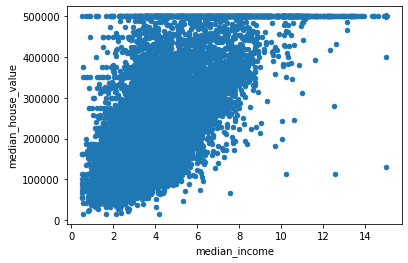

In [ ]:
df.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value')